# Assignment 2
## ✅ Rename the filename with your roll number. E.g. if your roll number is `MT24003` then rename the file `MT24003_a2.ipynb`.
## ✅ Write code only in the sections marked with `# YOUR CODE HERE`. No, you can NOT write code anywhere else.
## ✅ Download and extract the `data.zip` folder next to this file. If you extract it correctly, you will have a `data` folder next to this file.
## ✅ Submit a .zip (NOT .tar, .rar, etc) file containining:
###    1. This Notebook after filling the code where asked.
###    2. The loss and metric plots generated using the `save_training_report` functions [`auto_encoder.png` + `variational_auto_encoder.png` + `conditional_variational_auto_encoder.png`].
###    3. The model weights saved using the  `save_model_weights` functions [`auto_encoder.pth` + `variational_auto_encoder.pth` + `conditional_variational_auto_encoder.pth`].
## ❌ Do not modify any other function or class definitions; doing so may lead to the autograder failing to judge your submission, resulting in a zero.
## ❌ Deleting or adding new cells may lead to the `autograder` failing to judge your submission, resulting in a zero. Even if a cell is empty, do NOT delete it.
## ❌ Do NOT install / import any other libraries. You should be able to solve all the questions using only the libraries imported below.

In [ ]:
# check the curr no. of params  (Done)
# check for good architecture of ae
    #use ssim loss (DONE)

# implement it (DONE)

# check for good architecture of vae
# implement it
# verify the params of above

# check for good architecture of cvae
# implement it
# verify the params

# work on improving the above models:
      # data observation: mainly rotations, flips and random small occlusion augmentations are done

In [ ]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 -q
!pip install numpy==1.25.2 -q
!pip install soundfile==0.13.0 -q
!pip install pandas==2.2.3 -q
!pip install matplotlib==3.9.4 -q
!pip install scikit-image==0.21.0 -q
!pip install tqdm==4.67.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.

In [ ]:
import os
import random
import timeit
from pathlib import Path
from typing import Tuple
from skimage.metrics import structural_similarity as ssim
from numpy import array as NumpyArray
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchvision
from tqdm import tqdm

In [ ]:
PATH_TO_DATA_DIR = Path("./data")
PATH_TO_TRAIN_DATA_DIR = str(PATH_TO_DATA_DIR / "train")
PATH_TO_TEST_DATA_DIR = str(PATH_TO_DATA_DIR / "test")

In [ ]:
# ********************
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ******************
!unzip "/content/drive/MyDrive/DL_assignment/Assignment_2/data.zip"


Streaming output truncated to the last 5000 lines.
  inflating: data/train/clean/15383_9.png  
  inflating: __MACOSX/data/train/clean/._15383_9.png  
  inflating: data/train/clean/59294_8.png  
  inflating: __MACOSX/data/train/clean/._59294_8.png  
  inflating: data/train/clean/39025_3.png  
  inflating: __MACOSX/data/train/clean/._39025_3.png  
  inflating: data/train/clean/55802_7.png  
  inflating: __MACOSX/data/train/clean/._55802_7.png  
  inflating: data/train/clean/38805_0.png  
  inflating: __MACOSX/data/train/clean/._38805_0.png  
  inflating: data/train/clean/46753_9.png  
  inflating: __MACOSX/data/train/clean/._46753_9.png  
  inflating: data/train/clean/43135_9.png  
  inflating: __MACOSX/data/train/clean/._43135_9.png  
  inflating: data/train/clean/16472_3.png  
  inflating: __MACOSX/data/train/clean/._16472_3.png  
  inflating: data/train/clean/55279_6.png  
  inflating: __MACOSX/data/train/clean/._55279_6.png  
  inflating: data/train/clean/8412_7.png  
  inflating: __

In [ ]:
# *********************
clean_dir = os.path.join(PATH_TO_TEST_DATA_DIR, "clean")
augmented_dir = os.path.join(PATH_TO_TEST_DATA_DIR, "aug")

clean_image_files = [f for f in os.listdir(clean_dir) ]
augmented_image_files = [f for f in os.listdir(augmented_dir) ]

print(len(clean_image_files))
print(len(augmented_image_files))

5000
5000


In [ ]:
# ******************

# prompt: plot some images of same number from both clean and augmented

import matplotlib.pyplot as plt
import os
import random

# Assuming your augmented images are in a subdirectory named 'augmented'
# and your clean images are in a subdirectory named 'clean'.

def plot_images(number, path_to_data_dir):
    clean_dir = os.path.join(path_to_data_dir, "clean")
    augmented_dir = os.path.join(path_to_data_dir, "aug")

    # clean_image_files = [f for f in os.listdir(clean_dir) if f.startswith(str(number)) and f.endswith('.png')]
    # augmented_image_files = [f for f in os.listdir(augmented_dir) if f.startswith(str(number)) and f.endswith('.png')]

    clean_image_files = [f for f in os.listdir(clean_dir) if f.split('_')[0]==str(number)]
    augmented_image_files = [f for f in os.listdir(augmented_dir) if f.split('_')[0]==str(number)]

    if not clean_image_files or not augmented_image_files:
        print(f"No images found for number {number} in either clean or augmented directory.")
        return


    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    print(len(clean_image_files))
    print(len(augmented_image_files))
    # if(len(clean))
    random_clean_image_file = random.choice(clean_image_files)
    img_clean = plt.imread(os.path.join(clean_dir, random_clean_image_file))
    axes[0].imshow(img_clean)
    axes[0].set_title(f"Clean Image - {random_clean_image_file}")

    random_augmented_image_file = random.choice(augmented_image_files)
    img_augmented = plt.imread(os.path.join(augmented_dir, random_augmented_image_file))
    axes[1].imshow(img_augmented)
    axes[1].set_title(f"Augmented Image - {random_augmented_image_file}")

    plt.show()

# Example Usage: Plot images for number 0
plot_images(624, PATH_TO_TRAIN_DATA_DIR)

#Plot images for number 1
plot_images(624, PATH_TO_TRAIN_DATA_DIR)

# Plot images for number 2 to 9
for i in range(1, 10000):
  plot_images(i, PATH_TO_TRAIN_DATA_DIR)


Output hidden; open in https://colab.research.google.com to view.

# `q1`: `FashionMNIST` Dataset
1. Implement a Dataset class for the `FashionMNIST` data for the task of `Image Restoration`.
2. The task of `Image Restoration` is an [Ill-posed problem](https://en.wikipedia.org/wiki/Well-posed_problem) where the goal is to restore the original image from a corrupted image. Thus there may be more than one augmented image for each clean image, and vice versa.
3. The `data` directory has the following directory structure:
4. ```
	data
    ├── train
    │   ├── aug
    │   │   ├── <imagenumber>_<classlabel>.png
    │   │   ├── ...
    │   ├── clean
    │   │   ├── <imagenumber>_<classlabel>.png
    │   │   ├── ...
    └── test
        ├── aug
        │   ├── <imagenumber>_<classlabel>.png
        │   ├── ...
        └── clean
            ├── <imagenumber>_<classlabel>.png
            ├── ...
    ```
5. Constraints:
   1. The `__getitem__` method should return a tuple of the form `(aug_image, clean_image, label)`.  `clean_image` is the clean image, `aug_image` is the augmented image, and `label` is the class label of the image.
   2. Both `clean_image` and `aug_image` tensors should be of the shape `(1, 28, 28)` and of type `torch.float32`.
   3. Both `clean_image` and `aug_image` tensors should have pixel values between `[0, 1]`.
   4. `label` should be of type `torch.int64`.


`q1` Grading [Total: 1]: `1` point if the code runs without any errors on hidden test cases, otherwise `0` points. No partial points for this question.

In [ ]:
class FashionMNISTDataset(torch.utils.data.Dataset):
    """
    A PyTorch Dataset for loading paired FashionMNIST images (augmented and clean versions).

    Attributes:
        augmented_images (List[str]): List of file paths to augmented images, sorted alphabetically.
        clean_images (List[str]): List of file paths to clean images, sorted alphabetically.
    """
    def __init__(
        self, path_to_augmented_images_dir: str, path_to_clean_images_dir: str
    ):
        """
        Initializes the dataset by loading file paths for augmented and clean images.

        Args:
            path_to_augmented_images_dir (str): Path to the directory containing augmented images.
            path_to_clean_images_dir (str): Path to the directory containing clean images.
        """

        # self.train_transform = A.Compose([
        #     A.GaussNoise(var_limit=(10, 50), p=0.5),  # Add Gaussian noise
        #     # A.GaussianBlur(blur_limit=(3, 7), p=0.3),  # Slight blur
        #     # A.JpegCompression(quality_lower=50, quality_upper=80, p=0.3),  # JPEG artifacts
        #     # A.MotionBlur(blur_limit=3, p=0.3),  # Motion blur
        #     A.Rotate(limit=10, p=0.3),  # Random small rotations
        #     A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.2),  # Elastic deformations
        #     A.Normalize(mean=(0.5,), std=(0.5,)),  # Normalize
        #     ToTensorV2()
        # ])

        # self.target_transform = A.Compose([
        #     A.Normalize(mean=(0.5,), std=(0.5,)),  # Normalize target
        #     ToTensorV2()
        # ])

        self.augmented_images = sorted([os.path.join(path_to_augmented_images_dir, fname) for fname in os.listdir(path_to_augmented_images_dir)])
        self.clean_images = sorted([os.path.join(path_to_clean_images_dir, fname) for fname in os.listdir(path_to_clean_images_dir)])


    def __len__(self) -> int:
        """
        Returns the total number of samples in the dataset.

        Returns:
            int
        """
        return len(self.augmented_images)

    def __getitem__(self, idx) -> Tuple[torch.Tensor, torch.Tensor, int]:
        """
        Retrieves the augmented image, clean image, and label for a given index.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
                - Augmented image as a tensor with values normalized to [0, 1].
                - Clean image as a tensor with values normalized to [0, 1].
                - Label as an integer tensor, extracted from the filename.
        """
        # YOUR CODE HERE
        # noisy_image = self.train_transform(image=image)["image"]  # Apply noise only to input
        # clean_image = self.target_transform(image=image)["image"]  # Keep target clean

        # return noisy_image, clean_image

        # Load augmented image
        aug_image_path = self.augmented_images[idx]
        aug_image = torchvision.io.read_image(aug_image_path).float() / 255

        # Load clean image
        clean_image_path = self.clean_images[idx]
        clean_image = torchvision.io.read_image(clean_image_path).float() / 255
        #conver aug_image to numpy

        # aug_image_np = aug_image.permute(1, 2, 0).cpu().numpy()  /255
        # clean_image_np = clean_image.permute(1, 2, 0).cpu().numpy()
        # aug_image = self.train_transform(image=aug_image_np)["image"]  # Apply noise only to input
        # clean_image = self.target_transform(image=clean_image_np)["image"]  # Keep target clean


        # Extract label from the filename (assuming the format is <imagenumber>_<classlabel>.png)
        label = int(os.path.basename(aug_image_path).split('_')[-1].split('.')[0])

        return aug_image, clean_image, torch.tensor(label, dtype=torch.long)


60000
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
tensor(4)


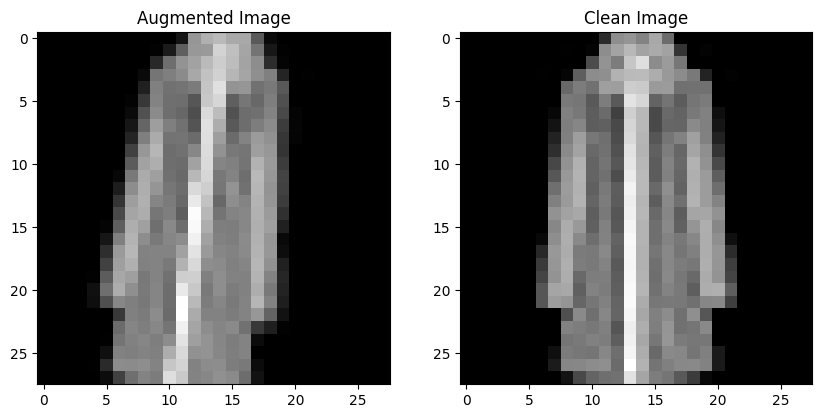

Label: 4


In [ ]:
# ********************

# Example usage
train_dataset = FashionMNISTDataset(
    path_to_augmented_images_dir=os.path.join(PATH_TO_TRAIN_DATA_DIR, "aug"),
    path_to_clean_images_dir=os.path.join(PATH_TO_TRAIN_DATA_DIR, "clean")
)

# Accessing the first sample
print(len(train_dataset))
aug_image, clean_image, label = train_dataset[0]
print(aug_image.shape)
print(clean_image.shape)
print(label)
# Displaying the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Augmented Image")
plt.imshow(aug_image.squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Clean Image")
plt.imshow(clean_image.squeeze(), cmap='gray')

plt.show()

print(f"Label: {label}")

In [ ]:
# tests for q1

path_to_train_images_aug_dir = str(PATH_TO_TRAIN_DATA_DIR + "/aug")
path_to_train_images_clean_dir = str(PATH_TO_TRAIN_DATA_DIR + "/clean")
fashion_mnist_dataset = FashionMNISTDataset(
    path_to_augmented_images_dir=path_to_train_images_aug_dir,
    path_to_clean_images_dir=path_to_train_images_clean_dir,
)


In [ ]:
# tests for q1

path_to_test_images_aug_dir = str(PATH_TO_TEST_DATA_DIR + "/aug")
path_to_test_images_clean_dir = str(PATH_TO_TEST_DATA_DIR + "/clean")
fashion_mnist_dataset = FashionMNISTDataset(
    path_to_augmented_images_dir=path_to_test_images_aug_dir,
    path_to_clean_images_dir=path_to_test_images_clean_dir,
)


del fashion_mnist_dataset

# `q2`: Encoder, and Decoder classes

* Your task is to create AutoEncoder models for the task of `Image Restoration` using the `FashionMNIST` dataset. You need to implement the `Encoder` and `Decoder` classes for the AutoEncoder model. The `Encoder` class will be used to encode the input image into a latent representation, and the `Decoder` class will be used to decode the latent representation back to the original image. The `Encoder` and `Decoder` classes will be used in the AutoEncoder model, Variational AutoEncoder model, and (optionally) Conditional AutoEncoder model, so the implementation should be **generic and not specific** to any of the models.
* `q2a`: `Encoder` class: Implement a generic Encoder Module that will be used within all the AutoEncoder flavors (AutoEncoder, Variational AutoEncoder, and (optinally) Conditional AutoEncoder). Constraints:
  1. The input tensor will be of shape `[batch_size, 1, 28, 28]` that comes out of the DataLoader of the `FashionMNIST` dataset.
  2. Feel free to use any architecture you like with any layer or activation function in it. **You can NOT use pre-trained model weights**.
  3. The output tensor must be of shape `[batch_size, output_channels, height, width]`. This tensor will be the latent representation of the input tensor and will be passed to the Decoder Module.
  4. The number of parameters in the Encoder Module must be between 2,000 and 1,000,000 (both inclusive). Note that the number of parameters in the Encoder Module and Decoder Module will be counted separately and may not be the same.

* `q2b`: `Decoder` class: Implement a generic Decoder Module that will be used within all the AutoEncoder flavors (AutoEncoder, Variational AutoEncoder, and (optinally) Conditional AutoEncoder). Constraints:
  1. The input tensor will be of shape `[batch_size, input_channels, height, width]` that comes out of the Encoder Module.
  2. Feel free to use any architecture you like with any layer or activation function in it. **You can NOT use pre-trained model weights**.
  3. The output tensor must be of shape `[batch_size, 1, 28, 28]`. This tensor will be the reconstructed image of the input tensor.
  4. The number of parameters in the Decoder Module must be between 2,000 and 1,000,000 (both inclusive). Note that the number of parameters in the Encoder Module and Decoder Module will be counted separately and may not be the same.

`q2` Grading [Total: 1 point]:
1. `q2a`: `Encoder` class: `0.5` points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
2. `q2b`: `Decoder` class:  `0.5` points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.

## `q2a`: `Encoder` class

In [ ]:
# class Encoder(torch.nn.Module):
#     def __init__(self, output_channels: int, type_of_autoencoder: str = None):
#         super(Encoder, self).__init__()
#         # YOUR CODE HERE
#         self.type_of_autoencoder = type_of_autoencoder

#         # Convolutional layers
#         self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)  # [batch_size, 32, 14, 14]
#         self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)  # [batch_size, 64, 7, 7]
#         self.conv3 = torch.nn.Conv2d(64, output_channels, kernel_size=3, stride=2, padding=1)  # [batch_size, output_channels, 4, 4]
#         self.flatten = torch.nn.Flatten()
#         # self.fc_mu = torch.nn.Linear(out * 4 * 4, output_channels)  # For VAE
#         self.fc_logvar = torch.nn.Linear(128 * 4 * 4, output_channels)  # For VAE

#         self.ae_encoder = torch.nn.Sequential(
#             torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),  # 28x28 -> 14x14
#             # torch.nn.BatchNorm2d(16),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(kernel_size=2, stride=2),  # MaxPooling added here


#             torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # 14x14 -> 7x7
#             # torch.nn.BatchNorm2d(32),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(kernel_size=2, stride=2),  # MaxPooling added here

#             torch.nn.Conv2d(32, output_channels, kernel_size=3, stride=1, padding=1),  # 7x7 -> 4x4
#             # torch.nn.BatchNorm2d(64),
#             torch.nn.ReLU(),
#             # torch.nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling added here
#         )

#         self.ae_ds_encoder = torch.nn.Sequential(
#             # Input: [batch_size, 1, 28, 28]
#             torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=4, stride=2, padding=1),  # [batch_size, 32, 14, 14]
#             torch.nn.ReLU(),
#             torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2, padding=1),  # [batch_size, 64, 7, 7]
#             torch.nn.ReLU(),
#             torch.nn.Conv2d(in_channels=64, out_channels=latent_dim, kernel_size=7, stride=1, padding=0),  # [batch_size, latent_dim, 1, 1]
#             torch.nn.ReLU()
#         )

#     def forward(self, x):

#         # x = self.flatten(x)

#         if self.type_of_autoencoder == "vae":
#             #
#             x = torch.nn.functional.relu(self.conv1(x))
#             x = torch.nn.functional.relu(self.conv2(x))
#             x = torch.nn.functional.relu(self.conv3(x))
#             logvar = self.fc_logvar(x)
#             mu = self.fc_mu(x)
#             return mu, logvar
#         else:  # Autoencoder (AE)
#             x = torch.nn.functional.relu(self.conv1(x))  # [batch_size, 32, 14, 14]
#             print(x.shape)
#             x = torch.nn.functional.relu(self.conv2(x))  # [batch_size, 64, 7, 7]
#             print(x.shape)
#             x = torch.nn.functional.relu(self.conv3(x))  # [batch_size, output_channels, 4, 4]
#             print(x.shape)
#             return x

#             return self.ae_ds_encoder(x)
#             # x = self.fc_ae(x)
#             # print("Input shape:", x.shape)  # Initial input shape
#             x = self.ae_encoder[0](x)
#             # print("After Conv2d(1, 16):", x.shape)

#             x = self.ae_encoder[1](x)
#             # print("After ReLU1:", x.shape)

#             x = self.ae_encoder[2](x)
#             # print("After MaxPool2d1:", x.shape)

#             x = self.ae_encoder[3](x)
#             # print("After Conv2d(16, 32):", x.shape)

#             x = self.ae_encoder[4](x)
#             # print("After ReLU2:", x.shape)

#             x = self.ae_encoder[5](x)
#             # print("After MaxPool2d2:", x.shape)

#             x = self.ae_encoder[6](x)
#             # print("After Conv2d(32, output_channels):", x.shape)

#             x = self.ae_encoder[7](x)
#             # print("After ReLU3:", x.shape)

#             # x = self.ae_encoder[8](x)
#             # print("After MaxPool2d3:", x.shape)

#         # return x(x)
#             return x


import torch
import torch.nn as nn
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, output_channels=64, type_of_autoencoder: str = None):
        super(Encoder, self).__init__()

        # Encoder layers: Convolutional layers followed by ReLU activations
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1)  # [batch_size, 32, 14, 14]
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1)  # [batch_size, 64, 7, 7]
        self.conv3 = nn.Conv2d(16, output_channels, kernel_size=3, stride=2, padding=1)  # [batch_size, output_channels, 4, 4]

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # -> N, 16, 14, 14
            nn.ReLU(),

            nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7), # -> N, 64, 1, 1
            nn.ReLU()
        )

    def forward(self, x):
        return self.encoder(x)
        # x = F.relu(self.conv1(x))  # [batch_size, 32, 14, 14]
        # print(x.shape)
        # x = F.relu(self.conv2(x))  # [batch_size, 64, 7, 7]
        # print(x.shape)
        # x = F.relu(self.conv3(x))  # [batch_size, output_channels, 4, 4]
        # print(x.shape)
        # return x


In [ ]:
# tests for q2a

encoder = Encoder(output_channels=64, type_of_autoencoder="vae")

random_input_tensor = torch.randn(1, 1, 28, 28)
output_tensor = encoder(random_input_tensor)


del encoder

In [ ]:

encoder = Encoder(output_channels=64, type_of_autoencoder="ae")

random_input_tensor = torch.randn(1, 1, 28, 28)
output_tensor = encoder(random_input_tensor)
print(output_tensor.shape)

del encoder

torch.Size([1, 64, 1, 1])


## `q2b`: `Decoder` class

In [ ]:
# class Decoder(torch.nn.Module):
#     def __init__(self, input_channels: int, type_of_autoencoder: str):
#         super(Decoder, self).__init__()
#         self.type_of_autoencoder = type_of_autoencoder

#         # # Fully connected layer to expand latent space representation
#         # self.fc = torch.nn.Linear(64 * 4 * 4, 128 * 4 * 4)

#         # Deconvolution layers to reconstruct image
#         self.deconv1 = torch.nn.ConvTranspose2d(input_channels, 64, kernel_size=3, stride=2, padding=1, output_padding=1)  # [batch_size, 64, 7, 7]
#         self.deconv2 = torch.nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)  # [batch_size, 32, 14, 14]
#         self.deconv3 = torch.nn.ConvTranspose2d(32, 1, kernel_size=3, stride=1, padding=1, output_padding=1)  # [batch_size, 1, 28, 28]

#         self.ae_decoder = torch.nn.Sequential(
#           # First deconvolution layer (upsample from 7x7 to 14x14)
#           torch.nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # 7x7 -> 14x14

#           torch.nn.ReLU(),

#           # Second deconvolution layer (upsample from 14x14 to 28x28)
#           torch.nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14 -> 28x28

#           # torch.nn.ReLU(),

#           # Third deconvolution layer (final output with 1 channel)
#           # torch.nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 28x28 -> 28x28
#           torch.nn.Sigmoid()  # Output in range [0, 1]
#       )

#         self.ae_ds_decoder = torch.nn.Sequential(
#             # Input: [batch_size, latent_dim, 1, 1]
#             torch.nn.ConvTranspose2d(in_channels=latent_dim, out_channels=64, kernel_size=7, stride=1, padding=0),  # [batch_size, 64, 7, 7]
#             torch.nn.ReLU(),
#             torch.nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=4, stride=2, padding=1),  # [batch_size, 32, 14, 14]
#             torch.nn.ReLU(),
#             torch.nn.ConvTranspose2d(in_channels=32, out_channels=1, kernel_size=4, stride=2, padding=1),  # [batch_size, 1, 28, 28]
#             torch.nn.Sigmoid()  # Output in the range [0, 1]
#         )

#     def forward(self, x):
#         x = torch.nn.functional.relu(self.deconv1(x))  # [batch_size, 64, 7, 7]
#         print(x.shape)
#         x = torch.nn.functional.relu(self.deconv2(x))  # [batch_size, 32, 14, 14]
#         print(x.shape)
#         x = torch.sigmoid(self.deconv3(x))  # [batch_size, 1, 28, 28] (sigmoid for [0, 1] pixel range)
#         print(x.shape)
#         return x


#         return self.ae_ds_decoder(x)
#         # print(x.shape)
#         # YOUR CODE HERE
#         # print(x.shape)
#         # if x.dim() == 4:  # If input is (batch_size, C, H, W), flatten before FC layer
#         #     x = x.view(x.size(0), -1)

#         # x = torch.nn.functional.relu(self.fc(x))  # Fully connected layer
#         # x = x.view(-1, 128, 4, 4)  # Reshape before deconvolution
#         # print(f"Input Shape: {x.shape}")  # Shape before decoding

#         x = self.ae_decoder[0](x)
#         # print(f"After ConvTranspose2d(64→32): {x.shape}")

#         x = self.ae_decoder[1](x)  # ReLU (does not change shape)
#         # print(f"After ReLU: {x.shape}")

#         x = self.ae_decoder[2](x)
#         # print(f"After ConvTranspose2d(32→16): {x.shape}")

#         # x = self.ae_decoder[3](x)  # ReLU
#         # print(f"After ReLU: {x.shape}")

#         # x = self.ae_decoder[4](x)
#         # print(f"After ConvTranspose2d(16→1): {x.shape}")

#         x = self.ae_decoder[3](x)  # Sigmoid (does not change shape)
#         # print(f"After Sigmoid: {x.shape}")

#         # return x

#         # x = self.ae_decoder(x)
#         # print(x.shape)

#         return x



class Decoder(nn.Module):
    def __init__(self, input_channels: int,   type_of_autoencoder : str):
        super(Decoder, self).__init__()

        # Decoder layers: Transpose convolutional layers followed by ReLU activations
        self.deconv1 = nn.ConvTranspose2d(input_channels, 16, kernel_size=3, stride=2, padding=1, output_padding=1)  # [batch_size, 64, 8, 8]
        self.deconv2 = nn.ConvTranspose2d(16, 8, kernel_size=3, stride=2, padding=1, output_padding=1)  # [batch_size, 32, 16, 16]
        self.deconv3 = nn.ConvTranspose2d(8, 1, kernel_size=3, stride=2, padding=1, output_padding=1)  # [batch_size, 1, 28, 28]
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), # -> N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28  (N,1,27,27 without output_padding)
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.decoder(x)
        # x = F.relu(self.deconv1(x))  # [batch_size, 64, 8, 8]
        # print(x.shape)
        # x = F.relu(self.deconv2(x))  # [batch_size, 32, 16, 16]
        # x = torch.sigmoid(self.deconv3(x))  # [batch_size, 1, 28, 28] (sigmoid for [0, 1] pixel range)
        # return x


In [ ]:
# tests for q2b

decoder = Decoder(input_channels=64, type_of_autoencoder="vae")

random_input_tensor = torch.randn(1, 64, 4, 4)
output_tensor = decoder(random_input_tensor)


del decoder

In [ ]:
decoder = Decoder(input_channels=64, type_of_autoencoder="ae")

random_input_tensor = torch.randn(1, 64, 1, 1)
output_tensor = decoder(random_input_tensor)
print(output_tensor.shape)

del decoder

torch.Size([1, 1, 28, 28])


# `q3`: AutoEncoder Model
* `q3a`: `AutoEncoder` class: Implement a AutoEncoder that uses the Encoder and Decoder Modules implemented in `q2a` and `q2b`. Constraints:
  1. The number of parameters in the AutoEncoder must be between 4,000 and 2,000,000 (both inclusive).
  2. The input tensor will be of shape `[batch_size, 1, 28, 28]` that comes out of the DataLoader of the `FashionMNIST` dataset.
  3. The output tensor must be of shape `[batch_size, 1, 28, 28]`. This tensor will be the reconstructed image of the input tensor.

* `q3b`: Training the models: Implement the training loop for the AutoEncoder model. Constraints:
  1. Use the `FashionMNIST` dataset implemented in `q1` to load the data.
  2. Use the `AutoEncoder` model implemented in `q3a`.
  3. You are free to choose any loss function, optimizer, and hyperparameters.
  4. **You must**:
     1. Book-keep the training and validation losses and SSIM scores for each epoch and use it to plot the training curves with the `AutoEncoder.save_training_report` method.
     2. To calculate the SSIM score, you can use the `get_ssim` function provided below.
     3. Save the model weights using `AutoEncoder.save_model_weights` method.


`q3` Grading [Total: 1.5 points]:
1. `q3a`: `AutoEncoder` class: `0.5` points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
2. `q3b`: Training the models: `1` points. You will be awarded points based on the SSIM score of the `AutoEncoder` model on a **hidden test set**. The grading will be as follows:
   1. 0.8 or more: `1` point
   2. 0.7 to 0.79: `0.8` points
   3. 0.6 to 0.69: `0.6` points
   4. 0.5 to 0.59: `0.4` points
   5. 0.4 to 0.49: `0.2` points
   6. Less than 0.4: `0` points


You are provided with the following template. **Populate only the sections marked as `# YOUR CODE HERE`. Do not modify other parts of the template.**

## `q3a`: `AutoEncoder` class

In [ ]:
class AutoEncoder(torch.nn.Module):
    def __init__(self, latent_dim: int):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder(output_channels=latent_dim, type_of_autoencoder="ae")
        self.decoder = Decoder(input_channels=latent_dim, type_of_autoencoder="ae")
        self.latent_dim = latent_dim

    def forward(self, input_tensor):
        # YOUR CODE HERE
        encoded = self.encoder(input_tensor)  # Pass through encoder
        # encoded = encoded.view(encoded.shape[0], -1)  # Flatten if needed
        # print(encoded.shape)

        decoded = self.decoder(encoded)  # Pass through decoder

        return decoded

    def save_model_weights(self):
        torch.save(self.state_dict(), "auto_encoder.pth")

    def load_model_weights(self):
        self.load_state_dict(torch.load("auto_encoder.pth"))

    def save_training_report(
        self,
        list_of_train_losses: List[float],
        list_of_val_losses: List[float],
        list_of_train_ssim_scores: List[float],
        list_of_val_ssim_scores: List[float],
    ):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Loss per Epoch")
        plt.plot(list_of_train_losses, label="Training")
        plt.plot(list_of_val_losses, label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.title("SSIM per Epoch")
        plt.plot(list_of_train_ssim_scores, label="Training")
        plt.plot(list_of_val_ssim_scores, label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("SSIM")
        plt.legend()

        plt.suptitle("AutoEncoder Training Report")

        plt.savefig("auto_encoder.png")
        plt.show()

In [ ]:
# tests for q3a

autoencoder = AutoEncoder(latent_dim=64)

random_input_tensor = torch.randn(1, 1, 28, 28)
output_tensor = autoencoder(random_input_tensor)


del autoencoder

## `q3b`: Training the model

In [ ]:
def get_ssim(
    list_of_predicted_images: List[NumpyArray], list_of_true_images: List[NumpyArray]
) -> List[float]:
    ssim_values = []
    for predicted_image, true_image in zip(
        list_of_predicted_images, list_of_true_images
    ):
        assert predicted_image.shape == (
            28,
            28,
        ), f"Expected image of shape (28, 28) but got {predicted_image.shape}"
        assert true_image.shape == (
            28,
            28,
        ), f"Expected image of shape (28, 28) but got {true_image.shape}"
        ssim_values.append(
            ssim(
                predicted_image,
                true_image,
                data_range=true_image.max() - true_image.min(),
            )
        )
    return sum(ssim_values) / len(ssim_values)

In [ ]:
# def gaussian_window(window_size, sigma):
#     """Creates a 2D Gaussian window."""
#     coords = torch.arange(window_size).float() - window_size // 2
#     grid = coords.unsqueeze(0).repeat(window_size, 1)
#     gaussian_kernel = torch.exp(-(grid**2 + grid.t()**2) / (2 * sigma**2))
#     gaussian_kernel /= gaussian_kernel.sum()
#     return gaussian_kernel.unsqueeze(0).unsqueeze(0)  # shape: (1, 1, window_size, window_size)

# window_size = 11
# sigma = 1.5
# gaussian_kernel = gaussian_window(window_size, sigma)

# def ssim_loss(predicted_image, true_image, data_range, window, window_size=11):
#     # Constants for SSIM
#     C1 = (0.01 * data_range) ** 2
#     C2 = (0.03 * data_range) ** 2

#     # Ensure the kernel is on the same device as the images
#     window = window.to(predicted_image.device)

#     # Compute means
#     mu_x = F.conv2d(predicted_image, window, stride=1, padding=window_size//2)
#     mu_y = F.conv2d(true_image, window, stride=1, padding=window_size//2)

#     # Compute variances and covariance
#     sigma_x2 = F.conv2d(predicted_image ** 2, window, stride=1, padding=window_size//2) - mu_x ** 2
#     sigma_y2 = F.conv2d(true_image ** 2, window, stride=1, padding=window_size//2) - mu_y ** 2
#     sigma_xy = F.conv2d(predicted_image * true_image, window, stride=1, padding=window_size//2) - mu_x * mu_y

#     # Compute SSIM
#     numerator = (2 * mu_x * mu_y + C1) * (2 * sigma_xy + C2)
#     denominator = (mu_x ** 2 + mu_y ** 2 + C1) * (sigma_x2 + sigma_y2 + C2)
#     ssim_map = numerator / denominator

#     return 1 - ssim_map.mean()


def ssim_loss(predicted_image, true_image, data_range):
    # Constants for SSIM
    C1 = (0.01 * data_range) ** 2
    C2 = (0.03 * data_range) ** 2

    # Compute mean (mu) of predicted and true images using a window (e.g., 11x11)
    mu_x = F.conv2d(predicted_image, weight=torch.ones(1, 1, 11, 11).to(predicted_image.device) / 121, stride=1, padding=5)
    mu_y = F.conv2d(true_image, weight=torch.ones(1, 1, 11, 11).to(true_image.device) / 121, stride=1, padding=5)

    # Compute variance (sigma^2) and covariance (sigma_xy)
    sigma_x2 = F.conv2d(predicted_image**2, weight=torch.ones(1, 1, 11, 11).to(predicted_image.device) / 121, stride=1, padding=5) - mu_x**2
    sigma_y2 = F.conv2d(true_image**2, weight=torch.ones(1, 1, 11, 11).to(true_image.device) / 121, stride=1, padding=5) - mu_y**2
    sigma_xy = F.conv2d(predicted_image * true_image, weight=torch.ones(1, 1, 11, 11).to(predicted_image.device) / 121, stride=1, padding=5) - mu_x * mu_y

    # Compute SSIM
    numerator = (2 * mu_x * mu_y + C1) * (2 * sigma_xy + C2)
    denominator = (mu_x**2 + mu_y**2 + C1) * (sigma_x2 + sigma_y2 + C2)
    ssim_map = numerator / denominator

    # Return SSIM loss (1 - SSIM)
    return 1 - ssim_map.mean()

In [ ]:
# Use this cell to:
# 1. Train the AutoEncoder model while bookkeeping the training and validation losses and SSIM scores for each epoch
# 2. Save the model weights using AutoEncoder.save_model_weights method
# 3. Save the training report using AutoEncoder.save_training_report method


# YOUR CODE HERE
# Define training parameters
num_epochs = 100
batch_size = 512
learning_rate = 1e-2
latent_dim = 64

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load datasets
train_dataset = FashionMNISTDataset(
    path_to_augmented_images_dir=PATH_TO_TRAIN_DATA_DIR + "/aug",
    path_to_clean_images_dir=PATH_TO_TRAIN_DATA_DIR + "/clean",
)
val_dataset = FashionMNISTDataset(
    path_to_augmented_images_dir=PATH_TO_TEST_DATA_DIR + "/aug",
    path_to_clean_images_dir=PATH_TO_TEST_DATA_DIR + "/clean",
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = AutoEncoder(latent_dim=latent_dim).to(device)
# criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Track losses and SSIM scores
train_losses, val_losses = [], []
train_ssim_scores, val_ssim_scores = [], []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    ssim_train_values = []

    for aug_images, clean_images, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        aug_images, clean_images = aug_images.to(device), clean_images.to(device)
        optimizer.zero_grad()
        outputs = model(aug_images)
        # loss = criterion(outputs, clean_images)
        # print(outputs.shape)
        # print(clean_images.shape  )
        # loss = ssim_loss(outputs, clean_images, data_range=clean_images.max() - clean_images.min())

        loss = ssim_loss(outputs, clean_images, data_range=clean_images.max() - clean_images.min())
        # loss = ssim_loss(outputs,  clean_images, data_range=clean_images.max() - clean_images.min(), window=gaussian_kernel, window_size=window_size)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Compute SSIM
        ssim_train_values.append(get_ssim(outputs.cpu().detach().numpy().squeeze(), clean_images.cpu().numpy().squeeze()))

    train_losses.append(running_loss / len(train_loader))
    train_ssim_scores.append(sum(ssim_train_values) / len(ssim_train_values))

    # Validation
    model.eval()
    val_loss = 0.0
    ssim_val_values = []

    with torch.no_grad():
        for aug_images, clean_images, _ in val_loader:
            aug_images, clean_images = aug_images.to(device), clean_images.to(device)
            outputs = model(aug_images)
            loss = ssim_loss(outputs, clean_images, data_range=clean_images.max() - clean_images.min())
            # loss = ssim_loss(outputs,  clean_images, data_range=clean_images.max() - clean_images.min(), window=gaussian_kernel, window_size=window_size)


            val_loss += loss.item()

            # Compute SSIM
            ssim_val_values.append(get_ssim(outputs.cpu().numpy().squeeze(), clean_images.cpu().numpy().squeeze()))

    val_losses.append(val_loss / len(val_loader))
    val_ssim_scores.append(sum(ssim_val_values) / len(ssim_val_values))

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train SSIM: {train_ssim_scores[-1]:.4f}, Val SSIM: {val_ssim_scores[-1]:.4f}")

# Save model weights
model.save_model_weights()

# Save training report
model.save_training_report(train_losses, val_losses, train_ssim_scores, val_ssim_scores)



Epoch 1/100: 100%|██████████| 118/118 [02:22<00:00,  1.21s/it]


Epoch [1/100], Train Loss: 0.4391, Val Loss: 0.2995, Train SSIM: 0.4009, Val SSIM: 0.5432


Epoch 2/100: 100%|██████████| 118/118 [02:22<00:00,  1.21s/it]


Epoch [2/100], Train Loss: 0.2812, Val Loss: 0.2674, Train SSIM: 0.5646, Val SSIM: 0.5811


Epoch 3/100: 100%|██████████| 118/118 [02:23<00:00,  1.22s/it]


Epoch [3/100], Train Loss: 0.2611, Val Loss: 0.2582, Train SSIM: 0.5896, Val SSIM: 0.5953


Epoch 4/100: 100%|██████████| 118/118 [02:23<00:00,  1.22s/it]


Epoch [4/100], Train Loss: 0.2512, Val Loss: 0.2498, Train SSIM: 0.6026, Val SSIM: 0.6047


Epoch 5/100: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Epoch [5/100], Train Loss: 0.2456, Val Loss: 0.2453, Train SSIM: 0.6099, Val SSIM: 0.6106


Epoch 6/100: 100%|██████████| 118/118 [02:23<00:00,  1.22s/it]


Epoch [6/100], Train Loss: 0.2413, Val Loss: 0.2415, Train SSIM: 0.6155, Val SSIM: 0.6164


Epoch 7/100: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Epoch [7/100], Train Loss: 0.2377, Val Loss: 0.2398, Train SSIM: 0.6200, Val SSIM: 0.6194


Epoch 8/100: 100%|██████████| 118/118 [02:23<00:00,  1.22s/it]


Epoch [8/100], Train Loss: 0.2346, Val Loss: 0.2374, Train SSIM: 0.6239, Val SSIM: 0.6205


Epoch 9/100: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Epoch [9/100], Train Loss: 0.2329, Val Loss: 0.2360, Train SSIM: 0.6259, Val SSIM: 0.6220


Epoch 10/100: 100%|██████████| 118/118 [02:23<00:00,  1.21s/it]


Epoch [10/100], Train Loss: 0.2310, Val Loss: 0.2370, Train SSIM: 0.6285, Val SSIM: 0.6241


Epoch 11/100: 100%|██████████| 118/118 [02:24<00:00,  1.23s/it]


Epoch [11/100], Train Loss: 0.2299, Val Loss: 0.2328, Train SSIM: 0.6298, Val SSIM: 0.6270


Epoch 12/100: 100%|██████████| 118/118 [02:22<00:00,  1.21s/it]


Epoch [12/100], Train Loss: 0.2284, Val Loss: 0.2327, Train SSIM: 0.6317, Val SSIM: 0.6273


Epoch 13/100: 100%|██████████| 118/118 [02:25<00:00,  1.23s/it]


Epoch [13/100], Train Loss: 0.2267, Val Loss: 0.2310, Train SSIM: 0.6338, Val SSIM: 0.6302


Epoch 14/100: 100%|██████████| 118/118 [02:22<00:00,  1.21s/it]


Epoch [14/100], Train Loss: 0.2261, Val Loss: 0.2339, Train SSIM: 0.6347, Val SSIM: 0.6269


Epoch 15/100: 100%|██████████| 118/118 [02:25<00:00,  1.23s/it]


Epoch [15/100], Train Loss: 0.2254, Val Loss: 0.2357, Train SSIM: 0.6357, Val SSIM: 0.6268


Epoch 16/100: 100%|██████████| 118/118 [02:24<00:00,  1.22s/it]


Epoch [16/100], Train Loss: 0.2246, Val Loss: 0.2285, Train SSIM: 0.6365, Val SSIM: 0.6336


Epoch 17/100: 100%|██████████| 118/118 [02:27<00:00,  1.25s/it]


Epoch [17/100], Train Loss: 0.2238, Val Loss: 0.2336, Train SSIM: 0.6377, Val SSIM: 0.6281


Epoch 18/100: 100%|██████████| 118/118 [02:24<00:00,  1.23s/it]


Epoch [18/100], Train Loss: 0.2235, Val Loss: 0.2282, Train SSIM: 0.6379, Val SSIM: 0.6338


Epoch 19/100: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Epoch [19/100], Train Loss: 0.2223, Val Loss: 0.2281, Train SSIM: 0.6394, Val SSIM: 0.6334


Epoch 20/100: 100%|██████████| 118/118 [02:24<00:00,  1.23s/it]


Epoch [20/100], Train Loss: 0.2222, Val Loss: 0.2277, Train SSIM: 0.6397, Val SSIM: 0.6349


Epoch 21/100: 100%|██████████| 118/118 [02:27<00:00,  1.25s/it]


Epoch [21/100], Train Loss: 0.2212, Val Loss: 0.2270, Train SSIM: 0.6408, Val SSIM: 0.6358


Epoch 22/100: 100%|██████████| 118/118 [02:24<00:00,  1.23s/it]


Epoch [22/100], Train Loss: 0.2207, Val Loss: 0.2261, Train SSIM: 0.6414, Val SSIM: 0.6355


Epoch 23/100: 100%|██████████| 118/118 [02:27<00:00,  1.25s/it]


Epoch [23/100], Train Loss: 0.2201, Val Loss: 0.2260, Train SSIM: 0.6422, Val SSIM: 0.6366


Epoch 24/100: 100%|██████████| 118/118 [02:25<00:00,  1.23s/it]


Epoch [24/100], Train Loss: 0.2197, Val Loss: 0.2265, Train SSIM: 0.6426, Val SSIM: 0.6370


Epoch 25/100: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Epoch [25/100], Train Loss: 0.2195, Val Loss: 0.2331, Train SSIM: 0.6430, Val SSIM: 0.6300


Epoch 26/100: 100%|██████████| 118/118 [02:24<00:00,  1.23s/it]


Epoch [26/100], Train Loss: 0.2192, Val Loss: 0.2276, Train SSIM: 0.6434, Val SSIM: 0.6354


Epoch 27/100: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Epoch [27/100], Train Loss: 0.2187, Val Loss: 0.2246, Train SSIM: 0.6439, Val SSIM: 0.6380


Epoch 28/100: 100%|██████████| 118/118 [02:24<00:00,  1.23s/it]


Epoch [28/100], Train Loss: 0.2181, Val Loss: 0.2249, Train SSIM: 0.6445, Val SSIM: 0.6374


Epoch 29/100: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Epoch [29/100], Train Loss: 0.2179, Val Loss: 0.2244, Train SSIM: 0.6448, Val SSIM: 0.6381


Epoch 30/100: 100%|██████████| 118/118 [02:23<00:00,  1.22s/it]


Epoch [30/100], Train Loss: 0.2175, Val Loss: 0.2251, Train SSIM: 0.6453, Val SSIM: 0.6384


Epoch 31/100: 100%|██████████| 118/118 [02:25<00:00,  1.23s/it]


Epoch [31/100], Train Loss: 0.2181, Val Loss: 0.2268, Train SSIM: 0.6448, Val SSIM: 0.6350


Epoch 32/100: 100%|██████████| 118/118 [02:24<00:00,  1.22s/it]


Epoch [32/100], Train Loss: 0.2170, Val Loss: 0.2240, Train SSIM: 0.6459, Val SSIM: 0.6393


Epoch 33/100: 100%|██████████| 118/118 [02:27<00:00,  1.25s/it]


Epoch [33/100], Train Loss: 0.2171, Val Loss: 0.2233, Train SSIM: 0.6459, Val SSIM: 0.6390


Epoch 34/100: 100%|██████████| 118/118 [02:25<00:00,  1.24s/it]


Epoch [34/100], Train Loss: 0.2165, Val Loss: 0.2232, Train SSIM: 0.6467, Val SSIM: 0.6397


Epoch 35/100:  56%|█████▌    | 66/118 [01:25<01:07,  1.30s/it]


KeyboardInterrupt: 

In [ ]:
# tests for q3b

# `q4`: Variational AutoEncoder Model
* `q4a`: `VariationalAutoEncoder` class: Implement a VariationalAutoEncoder that uses the Encoder and Decoder Modules implemented in `q2a` and `q2b`. Constraints:
  1. The number of parameters in the VariationalAutoEncoder must be between 4,000 and 2,000,000 (both inclusive).
  2. The input tensor will be of shape `[batch_size, 1, 28, 28]` that comes out of the DataLoader of the `FashionMNIST` dataset.
  3. The output tensor must be of shape `[batch_size, 1, 28, 28]`. This tensor will be the reconstructed image of the input tensor.

* `q4b`: Training the models: Implement the training loop for the VariationalAutoEncoder model. Constraints:
  1. Use the `FashionMNIST` dataset implemented in `q1` to load the data.
  2. Use the `VariationalAutoEncoder` model implemented in `q4a`.
  3. You are free to choose any loss function, optimizer, and hyperparameters.
  4. **You must**:
     1. Book-keep the training and validation losses and SSIM scores for each epoch and use it to plot the training curves with the `VariationalAutoEncoder.save_training_report` method.
     2. To calculate the SSIM score, you can use the `get_ssim` function provided below.
     3. Save the model weights using `VariationalAutoEncoder.save_model_weights` method.


`q4` Grading [Total: 1.5 points]:
1. `q4a`: `VariationalAutoEncoder` class: `0.5` points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
2. `q4b`: Training the models: `1` points. You will be awarded points based on the SSIM score of the `VariationalAutoEncoder` model on a **hidden test set**. The grading will be as follows:
   1. 0.8 or more: `1` point
   2. 0.7 or more: `0.8` points
   3. 0.6 or more: `0.6` points
   4. 0.5 or more: `0.4` points
   5. 0.4 or more: `0.2` points
   6. Less than 0.4: `0` points

You are provided with the following template. **Populate only the sections marked as `# YOUR CODE HERE`. Do not modify other parts of the template.**

## `q4a`: `VariationalAutoEncoder` class

In [ ]:
class VariationalAutoEncoder(torch.nn.Module):
    def __init__(self, latent_dim: int):
        super(VariationalAutoEncoder, self).__init__()
        self.encoder = Encoder(output_channels=latent_dim * 2, type_of_autoencoder="vae")
        self.decoder = Decoder(input_channels=latent_dim, type_of_autoencoder="vae")
        self.latent_dim = latent_dim

    def reparameterize(self, mu, log_var):
        # YOUR CODE HERE
        raise NotImplementedError()

    def forward(self, input_tensor):
        # YOUR CODE HERE
        raise NotImplementedError()

    def loss_function(self, predicted_images, gt_images, mu, log_var):
        # YOUR CODE HERE
        raise NotImplementedError()

    def save_model_weights(self):
        torch.save(self.state_dict(), "variational_auto_encoder.pth")

    def load_model_weights(self):
        self.load_state_dict(torch.load("variational_auto_encoder.pth"))

    def save_training_report(
        self,
        list_of_train_losses: List[float],
        list_of_val_losses: List[float],
        list_of_train_ssim_scores: List[float],
        list_of_val_ssim_scores: List[float],
    ):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Loss per Epoch")
        plt.plot(list_of_train_losses, label="Training")
        plt.plot(list_of_val_losses, label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.title("SSIM per Epoch")
        plt.plot(list_of_train_ssim_scores, label="Training")
        plt.plot(list_of_val_ssim_scores, label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("SSIM")
        plt.legend()

        plt.suptitle("VariationalAutoEncoder Training Report")

        plt.savefig("variational_auto_encoder.png")
        plt.show()

In [ ]:
# tests for q4a

variational_autoencoder = VariationalAutoEncoder(latent_dim=64)

random_input_tensor = torch.randn(1, 1, 28, 28)
output = variational_autoencoder(random_input_tensor)


del variational_autoencoder

## `q4b`: Training the model

In [ ]:
# Use this cell to:
# 1. Train the VariationalAutoEncoder model while bookkeeping the training and validation losses and SSIM scores for each epoch
# 2. Save the model weights using VariationalAutoEncoder.save_model_weights method
# 3. Save the training report using VariationalAutoEncoder.save_training_report method


# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# tests for q4b

# `q5`: [BONUS] Conditional Variational AutoEncoder Model
* `q5a`: `ConditionalVariationalAutoEncoder` class: Implement a ConditionalVariationalAutoEncoder that uses the Encoder and Decoder Modules implemented in `q2a` and `q2b`. Constraints:
  1. The number of parameters in the ConditionalVariationalAutoEncoder must be between 4,000 and 2,000,000 (both inclusive).
  2. The input tensor will be of shape `[batch_size, 1, 28, 28]` that comes out of the DataLoader of the `FashionMNIST` dataset.
  3. The output tensor must be of shape `[batch_size, 1, 28, 28]`. This tensor will be the reconstructed image of the input tensor.

* `q5b`: Training the models: Implement the training loop for the ConditionalVariationalAutoEncoder model. Constraints:
  1. Use the `FashionMNIST` dataset implemented in `q1` to load the data.
  2. Use the `ConditionalVariationalAutoEncoder` model implemented in `q5a`.
  3. You are free to choose any loss function, optimizer, and hyperparameters.
  4. **You must**:
     1. Book-keep the training and validation losses and SSIM scores for each epoch and use it to plot the training curves with the `ConditionalVariationalAutoEncoder.save_training_report` method.
     2. To calculate the SSIM score, you can use the `get_ssim` function provided below.
     3. Save the model weights using `ConditionalVariationalAutoEncoder.save_model_weights` method.


`q5` Grading [Total: 1 point]:
1. `q5b`: Training the models: `1` point. You will be awarded points based on the SSIM score of the `ConditionalVariationalAutoEncoder` model on a **hidden test set**. The grading will be as follows:
   1. 0.8 or more: `1` point
   2. 0.7 to 0.79: `0.5` points
   3. less than 0.7: `0` points

You are provided with the following template. **Populate only the sections marked as `# YOUR CODE HERE`. Do not modify other parts of the template.**

## `q5a`: [BONUS]`ConditionalVariationalAutoEncoder`

In [ ]:
class ConditionalVariationalAutoEncoder(torch.nn.Module):
    def __init__(self, latent_dim: int, condition_dim: int):
        super(ConditionalVariationalAutoEncoder, self).__init__()
        # YOUR CODE HERE
        raise NotImplementedError()

    def reparameterize(self, mu, log_var):
        # YOUR CODE HERE
        raise NotImplementedError()

    def forward(self, input_tensor, condition_tensor):
        # YOUR CODE HERE
        raise NotImplementedError()

    def loss_function(self, predicted_images, gt_images, mu, log_var):
        # YOUR CODE HERE
        raise NotImplementedError()

    def save_model_weights(self):
        torch.save(self.state_dict(), "conditional_variational_auto_encoder.pth")

    def load_model_weights(self):
        self.load_state_dict(torch.load("conditional_variational_auto_encoder.pth"))

    def save_training_report(
        self,
        list_of_train_losses: List[float],
        list_of_val_losses: List[float],
        list_of_train_ssim_scores: List[float],
        list_of_val_ssim_scores: List[float],
    ):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Loss per Epoch")
        plt.plot(list_of_train_losses, label="Training")
        plt.plot(list_of_val_losses, label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.title("SSIM per Epoch")
        plt.plot(list_of_train_ssim_scores, label="Training")
        plt.plot(list_of_val_ssim_scores, label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("SSIM")
        plt.legend()

        plt.suptitle("ConditionalVariationalAutoEncoder Training Report")

        plt.savefig("conditional_variational_auto_encoder.png")
        plt.show()

In [ ]:
# tests for q5a

conditional_variational_autoencoder = ConditionalVariationalAutoEncoder(
    latent_dim=64, condition_dim=10
)

random_input_tensor = torch.randn(1, 1, 28, 28)
random_condition_tensor = torch.randn(1, 10)
output = conditional_variational_autoencoder(
    random_input_tensor, random_condition_tensor
)


del conditional_variational_autoencoder

## `q5b`: [BONUS] Training the model

In [ ]:
# Use this cell to:
# 1. Train the ConditionalVariationalAutoEncoder model while bookkeeping the training and validation losses and SSIM scores for each epoch
# 2. Save the model weights using ConditionalVariationalAutoEncoder.save_model_weights method
# 3. Save the training report using ConditionalVariationalAutoEncoder.save_training_report method


# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# tests for q5b

In [ ]:
# tests for q3b, q4b, q5b

